In [1]:
import numpy as np 

import cv2 

from matplotlib import pyplot as plt 

### Ici on lit le fichier .raw

In [2]:
fichier = np.fromfile("F2.raw", np.uint8)

In [3]:
fichier = fichier.reshape((1080, 600, 1050))

In [4]:
cv2.imwrite('set1/img_'+str(0+1)+'.png',fichier[0])

True

### on fait un debruitage rapide avec opencv

In [5]:
debruite = cv2.fastNlMeansDenoising(img, None, 20, 7, 21) 

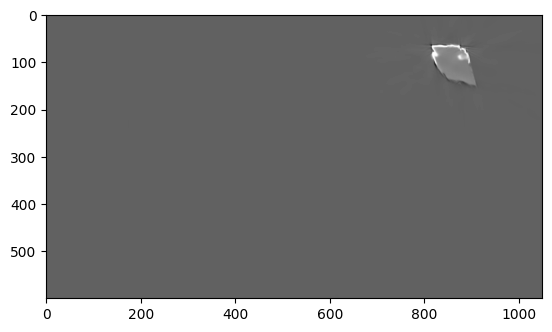

In [6]:
plt.imshow(debruite,cmap='gray')

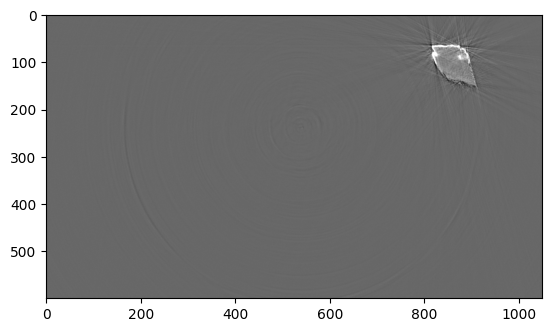

In [7]:
plt.imshow(img,cmap='gray')

In [67]:
def histogramme(img):
    histo=[0]*256
    for line in img:
        for pixel in line:
            histo[pixel]+=1
    plt.bar(range(255),np.log(histo[1:]))
    plt.show()
    
def histo(img):
    histo=[0]*256
    for line in img:
        for pixel in line:
            histo[pixel]+=1
    return np.array(histo)

### le logarithme des hstogrammes

C:\Users\dell\AppData\Local\Temp\ipykernel_14352\1613276810.py:6: RuntimeWarning: divide by zero encountered in log
  plt.bar(range(255),np.log(histo[1:]))


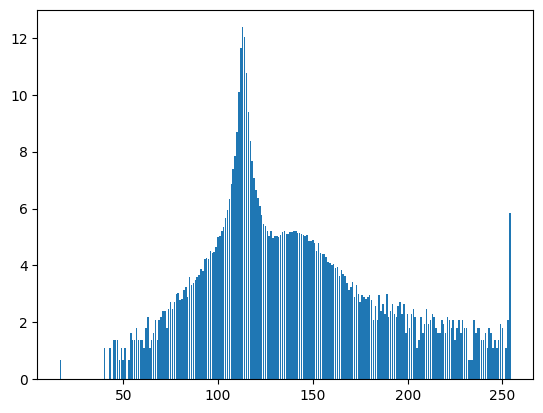

In [68]:
histogramme(img)

C:\Users\dell\AppData\Local\Temp\ipykernel_14352\1613276810.py:6: RuntimeWarning: divide by zero encountered in log
  plt.bar(range(255),np.log(histo[1:]))


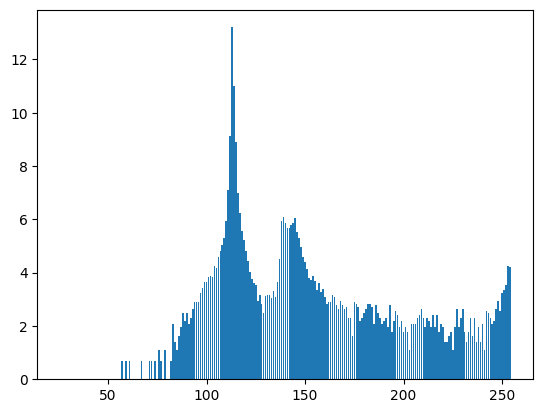

In [69]:
histogramme(debruite)

# Segmentation

In [104]:
def seg(img):
    hstg=histo(img)
    somme=sum(hstg[1:])
    s=0
    for i,c in enumerate(hstg):
        s+=i*c
    s=s/somme
    return s
def image_segmente(img):
    mid=seg(img)
    
    n,m=len(img),len(img[0])
    
    r=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            if img[i][j]>=mid:
                r[i][j]=255
            else:
                r[i][j]=0
    return r
def image_segmente2(img):
    mid=seg(img)
    n,m=len(img),len(img[0])
    
    r=np.copy(img)
    for i in range(n):
        for j in range(m):
            if img[i][j]<=mid:
                r[i][j]=0
    histogramme(r)
    mid=seg(r)
    for i in range(n):
        for j in range(m):
            if r[i][j]<=mid:
                r[i][j]=0
            else:
                r[i][j]=255
    histogramme(r)
    return r
def seg3(img,p=4,bias=0.7):
    hst=np.log(histo(img))
    r=[]
    for i,c in enumerate(hst):
        if c>=p:
            r.append(i)
    l=[r[0]]
    for c in r:
        if abs(l[-1]-c)<=1:
            l[-1]=c
        else:
            l.append(c)
    pike1=l[0]
    pike2=l[1]
    mid=(pike1+pike2*bias)/(bias+1)
    return mid
def image_segmente3(img,mid):
    n,m=len(img),len(img[0])
    
    r=np.zeros((n,m))
    for i in range(n):
        for j in range(m):
            if img[i][j]>=mid:
                r[i][j]=255
            else:
                r[i][j]=0
    return r

### on segmente en utilisant le barycentre

In [105]:
seg3(debruite)

C:\Users\dell\AppData\Local\Temp\ipykernel_14352\2462196614.py:42: RuntimeWarning: divide by zero encountered in log
  hst=np.log(histo(img))


134.94117647058823

C:\Users\dell\AppData\Local\Temp\ipykernel_14352\2462196614.py:42: RuntimeWarning: divide by zero encountered in log
  hst=np.log(histo(img))


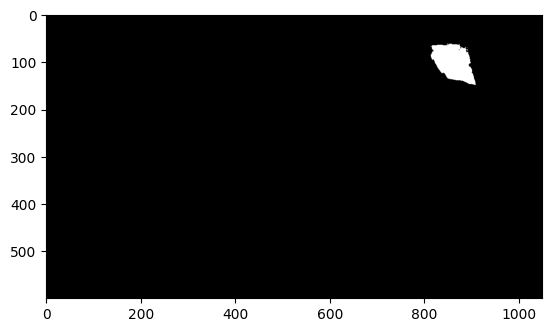

In [106]:
new_im=image_segmente3(debruite,seg3(debruite))
plt.imshow(new_im,cmap='gray')

### Resultat pour image bruite

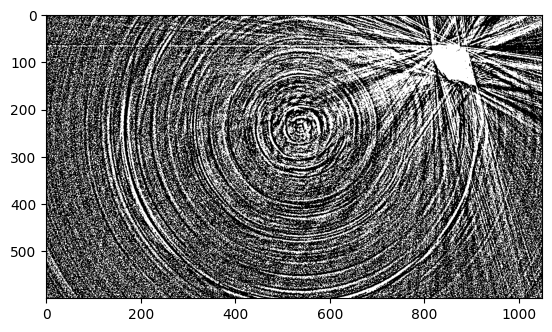

In [63]:
new_im2=image_segmente(img)
plt.imshow(new_im2,cmap='gray')

In [4]:
from tqdm import tqdm

In [17]:
toute_im_seg=[]
for i,img in tqdm(enumerate(fichier)):
    debruite = cv2.fastNlMeansDenoising(img, None, 20, 7, 21) 
    new_im=image_segmente(debruite)
    toute_im_seg.append(new_im)
    cv2.imwrite('img_seg/img_'+str(i+1)+'.png',new_im)

1080it [44:44,  2.49s/it]


1
